# Baseline vs Sub-harmonic Resonance Experiment

This notebook compares fundamental (baseline) resonance with sub-harmonic resonances in a driven qubit. 

The goal of this experiment is to compare ordinary (fundamental) resonance with sub-harmonic resonances in a driven two-level system. The fundamental resonance corresponds to driving the qubit at its natural frequency, while sub-harmonic resonances occur when the system responds at fractional drive frequencies due to strong and longitudinal driving components.

## Setup

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [27]:
# Time grid
tlist = np.linspace(0,5000,10000)


# Initial state = ground state
psi0 = basis(2, 0)


# No noise
g1 = 0.0 # relaxation (T1)
g2 = 0.0 # dephasing (T2)


# Solver choice
solver = "me"

## Definition of the system

Same as the given notebook definition.

In [28]:
def qubit_integrate_labframe(omega_0, omega_d, rabi, theta,psi0, solver, phi = 0, g1 = 0, g2 = 0):

    H0 = (omega_0/2) * sigmaz()
    H1 = 2 * rabi * np.sin(theta) * sigmax()
    H2 = 2 * rabi * np.cos(theta) * sigmaz()
    
    def H1_coeff(t, args):
        return np.cos(omega_d*t+phi)
        
    def H2_coeff(t, args):
        return np.cos(omega_d*t+phi)
    
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
    
    H = [H0, [H1,H1_coeff],  [H2,H2_coeff]]
    
    if solver == "me": # master equation
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "es": # exact schrodinger
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc": # monte carlo
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, e_ops)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

## Transversal field

### Fundamental resonance

We first establish a baseline reference using a purely transverse drive at the qubit’s natural frequency.

Conditions:
- Drive frequency: omega_d = omega_0
- Inclination angle: theta = pi/2
- Weak driving strength

We use weak driving to clearly observe subharmonic resonances without strong dressing effects or additional nonlinearities, making the comparison with the fundamental resonance more straightforward.

In [29]:
omega_0 = 1.0 * np.pi
omega_d = omega_0
rabi   = 0.05 * np.pi # weak driving
theta = 0.5 * np.pi

_, _, sz_baseline = qubit_integrate_labframe(
omega_0, omega_d, rabi, theta,
psi0, solver, g1, g2
)

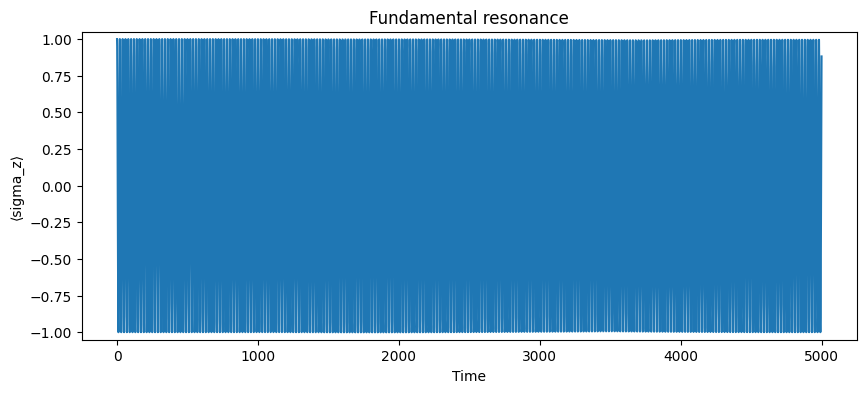

In [30]:
plt.figure(figsize=(10,4))
plt.plot(tlist, sz_baseline)
plt.title("Fundamental resonance")
plt.xlabel("Time")
plt.ylabel("⟨sigma_z⟩")
plt.ylim(-1.05, 1.05)
plt.show()

Driving at the qubit's natural frequency produces fast, high-contrast Rabi oscillations, reflecting efficient single-photon transitions.

### Sub-harmonic resonances

We now introduce sub-harmonic resonances. To compare the fundamental resonance with a sub-harmonic resonance, all system parameters were kept identical while only the driving frequency ω_d was changed from ω_0 to approximately ω_0/3.

In [46]:
theta = 0.5 * np.pi
omega_d = 1.0 * np.pi * 0.3371
rabi   = 0.05 * np.pi

_, _, sz_sub_3 = qubit_integrate_labframe(
omega_0, omega_d, rabi, theta,
psi0, solver, g1, g2
)

### Comparison Plot

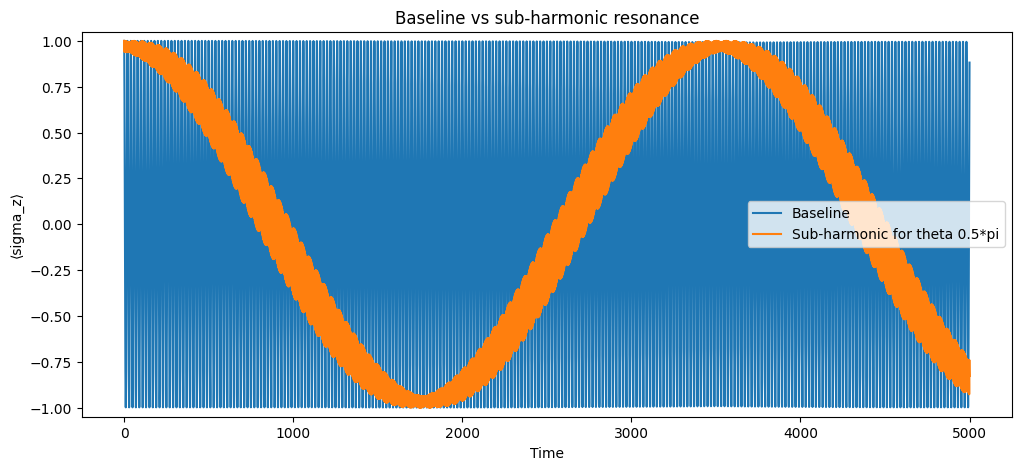

In [47]:
plt.figure(figsize=(12,5))
plt.plot(tlist, sz_baseline, label="Baseline")
plt.plot(tlist, sz_sub_3, label="Sub-harmonic for theta 0.5*pi")

plt.xlabel("Time")
plt.ylabel("⟨sigma_z⟩")
plt.ylim(-1.05, 1.05)
plt.legend()
plt.title("Baseline vs sub-harmonic resonance")
plt.show()

Overlaying the baseline and subharmonic responses highlights the slower and weaker nature of the subharmonic resonance relative to the fundamental.

## Non-transversal field

We know introduce a longitudinal driving as well, by taking $\theta$ different from $\pi/2$. To test the effects of the longitudinal component sub-harmonic resonance, we repeated the simulation for different inclination angles θ while keeping the transverse driving strength fixed. We scale rabi to keep the transverse driving strength fixed while varying $\theta$.

### Fundamental Resonance, Sub-harmonic Resonance and Comparison Plots

For theta = 0.25 * np.pi

In [33]:
omega_0 = np.pi
omega_d = omega_0

theta = 0.25 * np.pi 
rabi  = 0.05 * np.pi / np.sin(theta)

_, _, sz_baseline_2 = qubit_integrate_labframe(
omega_0, omega_d, rabi, theta,
psi0, solver, g1, g2
)

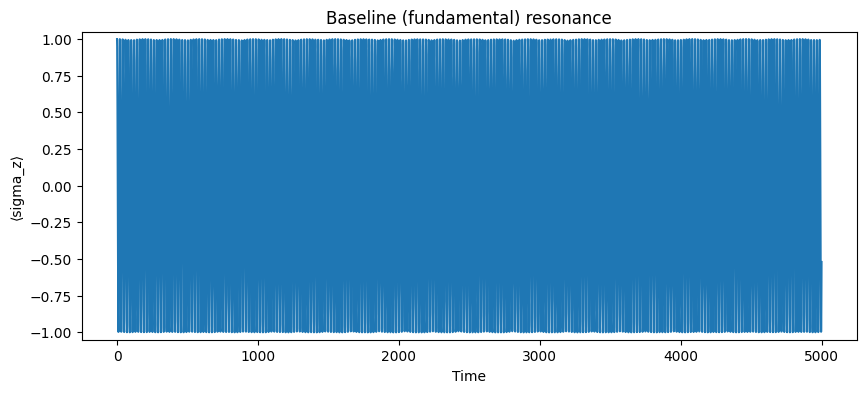

In [34]:
plt.figure(figsize=(10,4))
plt.plot(tlist, sz_baseline_2)
plt.title("Baseline (fundamental) resonance")
plt.xlabel("Time")
plt.ylabel("⟨sigma_z⟩")
plt.ylim(-1.05, 1.05)
plt.show()

In [35]:
theta = 0.25 * np.pi     
rabi  = 0.05 * np.pi / np.sin(theta)
omega_d = 1.0 * np.pi * 0.3371

_, _, sz_sub_3_2 = qubit_integrate_labframe(
omega_0, omega_d, rabi, theta,
psi0, solver, g1, g2
)

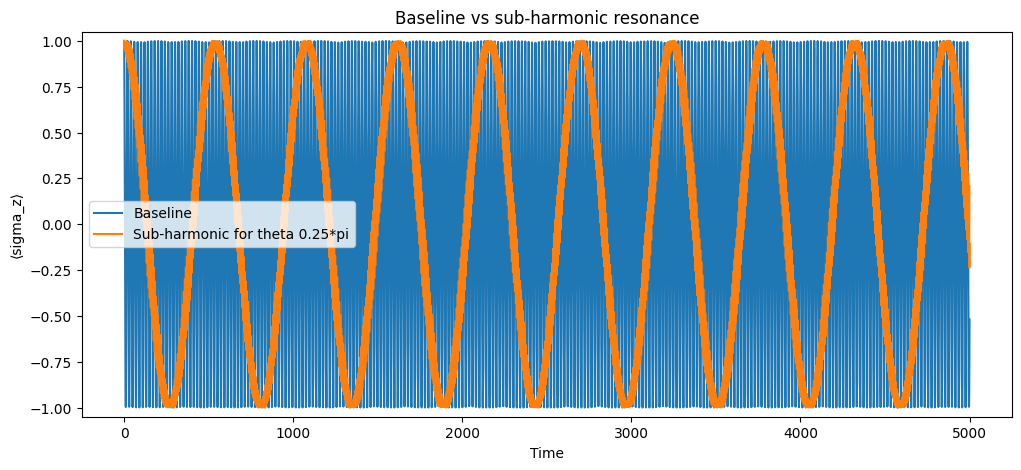

In [36]:
plt.figure(figsize=(12,5))
plt.plot(tlist, sz_baseline_2, label="Baseline")
plt.plot(tlist, sz_sub_3_2, label="Sub-harmonic for theta 0.25*pi")


plt.xlabel("Time")
plt.ylabel("⟨sigma_z⟩")
plt.ylim(-1.05, 1.05)
plt.legend()
plt.title("Baseline vs sub-harmonic resonance")
plt.show()

For theta = 0.45 * np.pi 

In [67]:
omega_0 = np.pi
omega_d = omega_0

theta = 0.45 * np.pi 
rabi  = 0.05 * np.pi / np.sin(theta)

_, _, sz_baseline_2 = qubit_integrate_labframe(
omega_0, omega_d, rabi, theta,
psi0, solver, g1, g2
)

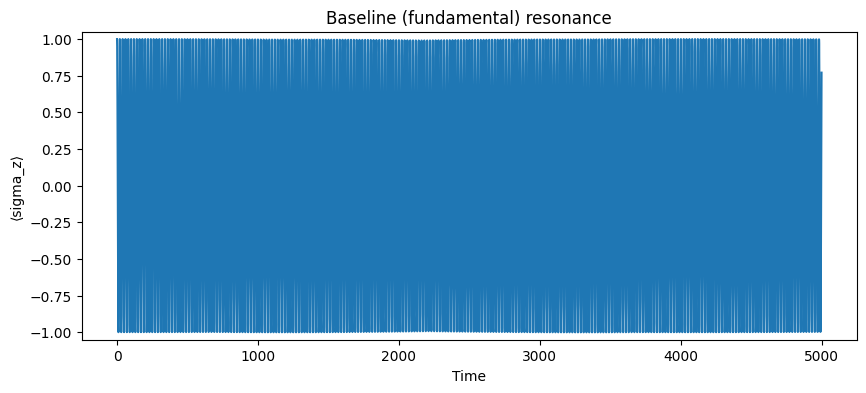

In [68]:
plt.figure(figsize=(10,4))
plt.plot(tlist, sz_baseline_2)
plt.title("Baseline (fundamental) resonance")
plt.xlabel("Time")
plt.ylabel("⟨sigma_z⟩")
plt.ylim(-1.05, 1.05)
plt.show()

In [69]:
theta = 0.45 * np.pi 
rabi  = 0.05 * np.pi / np.sin(theta)
omega_d = 1.0 * np.pi * 0.3371

_, _, sz_sub_3_2 = qubit_integrate_labframe(
omega_0, omega_d, rabi, theta,
psi0, solver, g1, g2
)

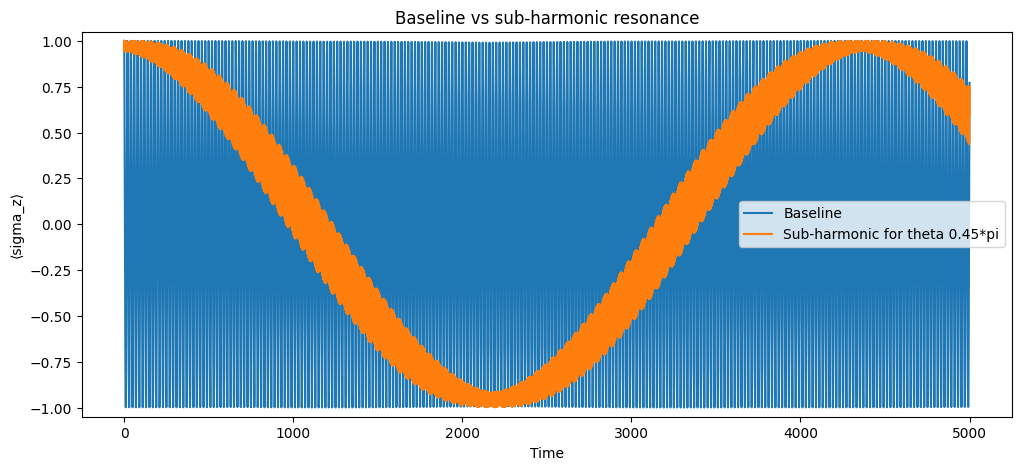

In [70]:
plt.figure(figsize=(12,5))
plt.plot(tlist, sz_baseline_2, label="Baseline")
plt.plot(tlist, sz_sub_3_2, label="Sub-harmonic for theta 0.45*pi")


plt.xlabel("Time")
plt.ylabel("⟨sigma_z⟩")
plt.ylim(-1.05, 1.05)
plt.legend()
plt.title("Baseline vs sub-harmonic resonance")
plt.show()

For theta = 0.49 * np.pi 

In [41]:
omega_0 = np.pi
omega_d = omega_0

theta = 0.49 * np.pi 
rabi  = 0.05 * np.pi / np.sin(theta)

_, _, sz_baseline_2 = qubit_integrate_labframe(
omega_0, omega_d, rabi, theta,
psi0, solver, g1, g2
)

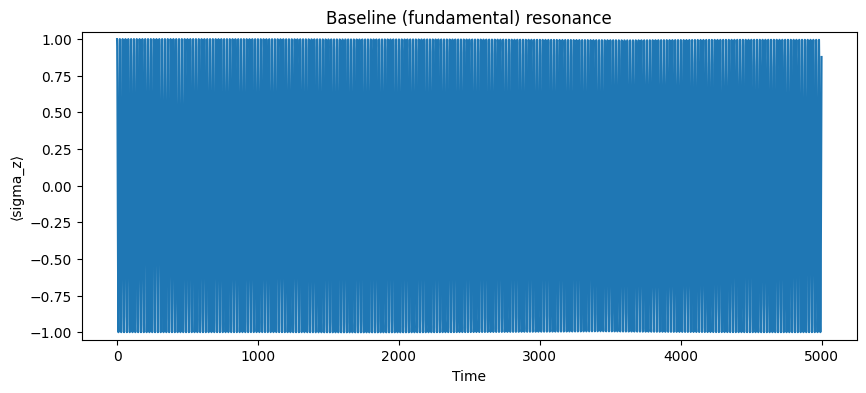

In [42]:
plt.figure(figsize=(10,4))
plt.plot(tlist, sz_baseline_2)
plt.title("Baseline (fundamental) resonance")
plt.xlabel("Time")
plt.ylabel("⟨sigma_z⟩")
plt.ylim(-1.05, 1.05)
plt.show()

In [43]:
theta = 0.49 * np.pi 
rabi  = 0.05 * np.pi / np.sin(theta)
omega_d = 1.0 * np.pi * 0.3371

_, _, sz_sub_3_2 = qubit_integrate_labframe(
omega_0, omega_d, rabi, theta,
psi0, solver, g1, g2
)

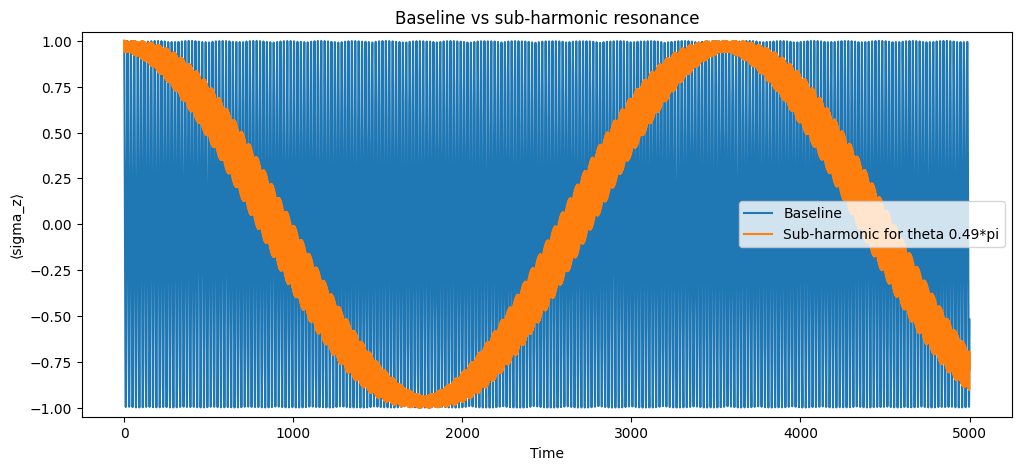

In [21]:
plt.figure(figsize=(12,5))
plt.plot(tlist, sz_baseline_2, label="Baseline")
plt.plot(tlist, sz_sub_3_2, label="Sub-harmonic for theta 0.49*pi")


plt.xlabel("Time")
plt.ylabel("⟨sigma_z⟩")
plt.ylim(-1.05, 1.05)
plt.legend()
plt.title("Baseline vs sub-harmonic resonance")
plt.show()

The fundamental resonance remains strong, with fast oscillations. The longitudinal component slightly modifies the oscillation shape but does not suppress the single-photon transition.

Adding a longitudinal component enhances the subharmonic resonance, producing larger, smoother oscillations. Increasing the longitudinal contribution strengthens multi-photon transitions. ???